In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import os
%matplotlib inline

import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [ ]:
df=pd.read_csv("/Dataset.csv",sep=',',engine='python')
df=df[['total_gen','date_time']]
# df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change Datatype
#https://stackoverflow.com/questions/8420143/valueerror-could-not-convert-string-to-float-id
df = df.replace(r'^\s*$', np.nan, regex=True)
df['total_gen']=df['total_gen'].astype(float)
df['date_time']=pd.to_datetime(df['date_time'])

In [ ]:
df.isnull().sum()

total_gen    2070
date_time       0
dtype: int64

In [ ]:
df.shape

(44518, 2)

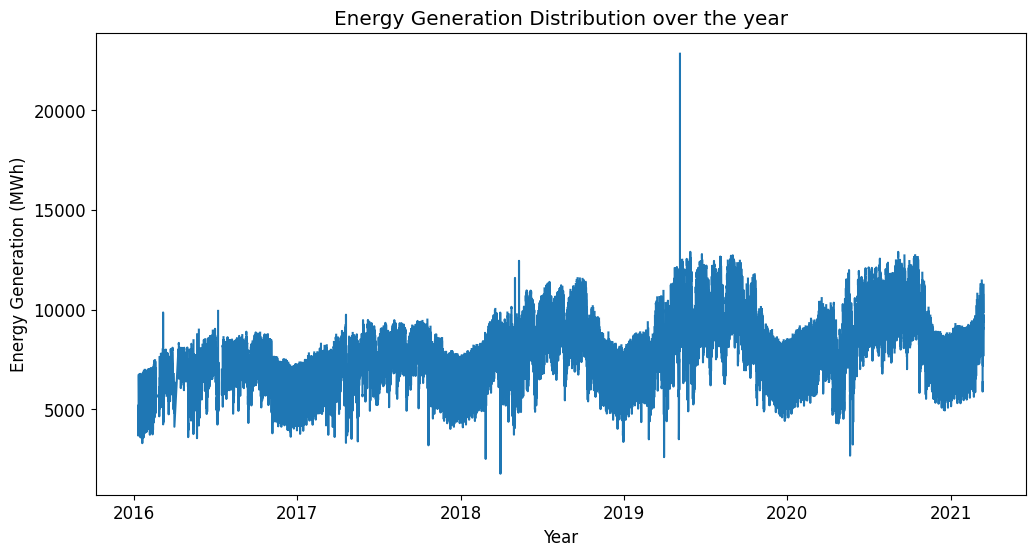

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['date_time'],df['total_gen'])
plt.title('Energy Generation Distribution over the year')
plt.xlabel('Year')
plt.ylabel("Energy Generation (MWh)")
plt.rcParams.update({'font.size': 12})
plt.show()

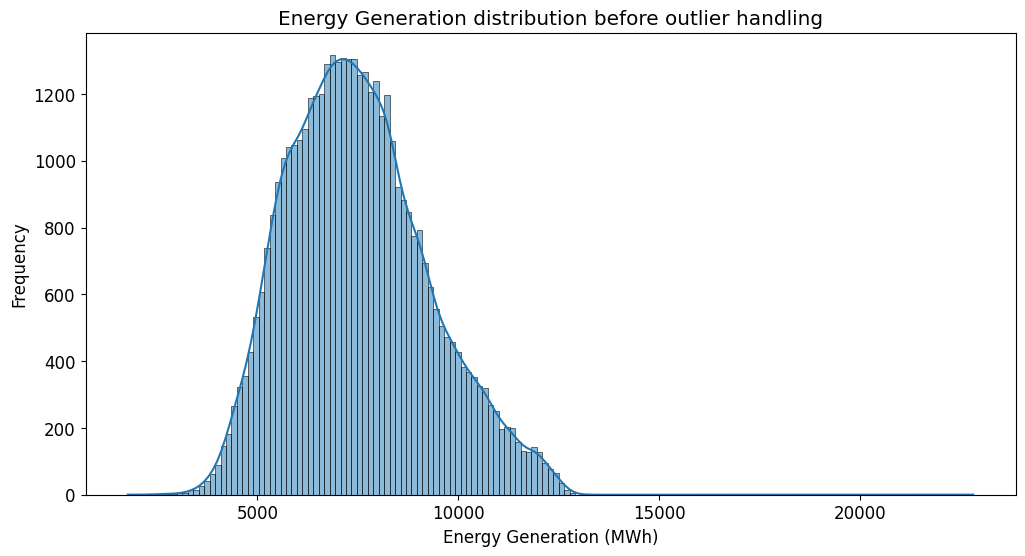

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df.total_gen,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Energy Generation (MWh)')
plt.title('Energy Generation distribution before outlier handling')
plt.show()

In [ ]:
df.describe()

,total_gen
count,42448.000000
mean,7509.930968
std,1741.432453
min,1774.000000
25%,6222.000000
50%,7364.000000
75%,8602.000000
max,22819.000000


In [ ]:
mean_df=df['total_gen'].mean()
std_df=df['total_gen'].std()
print(mean_df,std_df)

7509.930968243498 1741.432452542151


In [ ]:
def merge_outlier(df,columns,n_std):
  for col in columns:
    #print('Working on columns: {}'.format(col))
    mean=df[col].mean()
    std=df[col].std()

    pos_limit=mean+(n_std*std)
    neg_limit=mean-(n_std*std)

    merge_outliers=df[(df[col]<=neg_limit)|(df[col]>=pos_limit)]
    #outliers_values=merge_outliers.values.tolist()
    #df2=df.replace(outliers_values,np.NaN)

  return merge_outliers

In [ ]:
df2=df
columns=['total_gen']
n_std=3
merge_outlier(df2,columns,n_std)

,total_gen,date_time
18581,1774.0,2018-03-31 07:00:00
18582,2256.0,2018-03-31 08:00:00
28217,22819.0,2019-05-06 19:00:00
28771,12893.0,2019-05-29 21:00:00
28772,12882.0,2019-05-29 22:00:00
29395,12780.0,2019-06-24 21:00:00
39931,12892.0,2020-09-05 21:00:00


In [ ]:
merge_outlier(df2,columns,n_std).total_gen.values

array([ 1774.,  2256., 22819., 12893., 12882., 12780., 12892.])

In [ ]:
#outlier values convert to null
outlier_values=merge_outlier(df2,columns,n_std).total_gen.values.tolist()
df3=df2.replace(outlier_values,np.NaN)
df3[39925:39935]

,total_gen,date_time
39925,10736.0,2020-09-05 15:00:00
39926,10788.0,2020-09-05 16:00:00
39927,10341.0,2020-09-05 17:00:00
39928,9863.0,2020-09-05 18:00:00
39929,NaN,2020-09-05 19:00:00
39930,12671.0,2020-09-05 20:00:00
39931,NaN,2020-09-05 21:00:00
39932,12704.0,2020-09-05 22:00:00
39933,12571.0,2020-09-05 23:00:00
39934,12554.0,2020-09-06 00:00:00


In [ ]:
df4=df3.interpolate(method='bfill')

In [ ]:
df4[39925:39935]

,total_gen,date_time
39925,10736.0,2020-09-05 15:00:00
39926,10788.0,2020-09-05 16:00:00
39927,10341.0,2020-09-05 17:00:00
39928,9863.0,2020-09-05 18:00:00
39929,12671.0,2020-09-05 19:00:00
39930,12671.0,2020-09-05 20:00:00
39931,12704.0,2020-09-05 21:00:00
39932,12704.0,2020-09-05 22:00:00
39933,12571.0,2020-09-05 23:00:00
39934,12554.0,2020-09-06 00:00:00


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44518 entries, 0 to 44517
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   total_gen  44518 non-null  float64       
 1   date_time  44518 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 695.7 KB


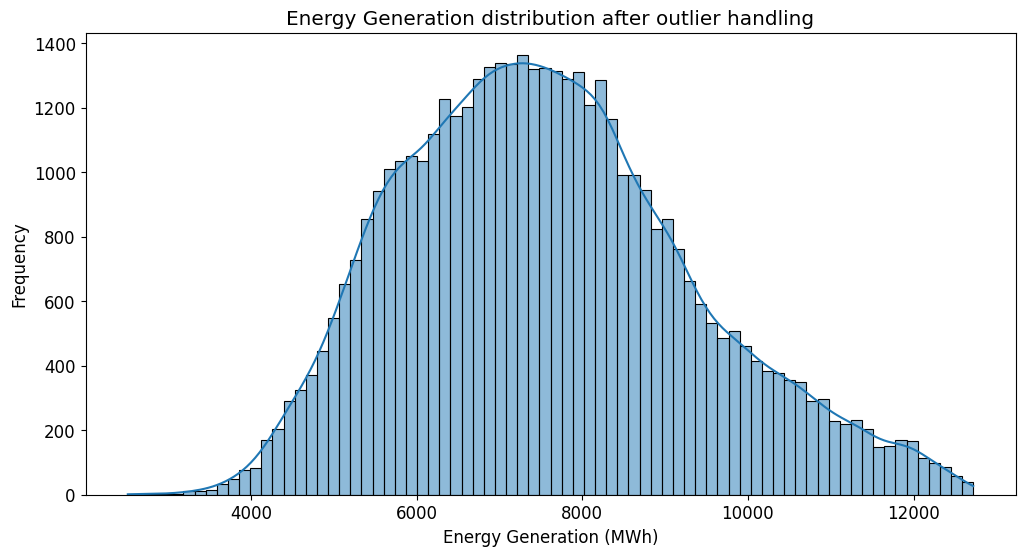

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df4.total_gen, kde=True)
plt.ylabel('Frequency')
plt.xlabel('Energy Generation (MWh)')
plt.title('Energy Generation distribution after outlier handling')
plt.show()
plt.show()

In [ ]:
df.describe()

,total_gen
count,42448.000000
mean,7509.930968
std,1741.432453
min,1774.000000
25%,6222.000000
50%,7364.000000
75%,8602.000000
max,22819.000000


In [ ]:
mean_df=df['total_gen'].mean()
std_df=df['total_gen'].std()
print(mean_df,std_df)

7509.930968243498 1741.432452542151


In [ ]:
data=df4.copy()

In [ ]:
data['Lag1']=data['total_gen'].shift(1)
data['Lag3']=data['total_gen'].shift(3)

data['Lag5']=data['total_gen'].shift(5)
data['Lag8']=data['total_gen'].shift(8)
data['Lag12']=data['total_gen'].shift(12)
data['Lag24']=data['total_gen'].shift(24)
data['Lag168']=data['total_gen'].shift(168)
data['Lag720']=data['total_gen'].shift(720)
data['Lag2160']=data['total_gen'].shift(2160)
data['Lag8760']=data['total_gen'].shift(8760)

In [ ]:
#data['Lag1']=data['total_gen'].rolling(window=1).mean()
data['mov_av3']=data['total_gen'].rolling(window=3).mean()
data['mov_av5']=data['total_gen'].rolling(window=5).mean()
data['mov_av8']=data['total_gen'].rolling(window=8).mean()
data['mov_av12']=data['total_gen'].rolling(window=12).mean()
data['mov_1day']=data['total_gen'].rolling(window=24).mean()
data['mov_1week']=data['total_gen'].rolling(window=168).mean()
data['mov_av_mnth']=data['total_gen'].rolling(window=720).mean()
data['mov_av_qtr']=data['total_gen'].rolling(window=2160).mean()
data['mov_av_1year']=data['total_gen'].rolling(window=8760).mean()

In [ ]:
data.head()

,total_gen,date_time,Lag1,Lag3,Lag5,Lag8,Lag12,Lag24,Lag168,Lag720,...,Lag8760,mov_av3,mov_av5,mov_av8,mov_av12,mov_1day,mov_1week,mov_av_mnth,mov_av_qtr,mov_av_1year
0,4688.0,2016-01-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4147.0,2016-01-11 01:00:00,4688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3918.0,2016-01-11 02:00:00,4147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3827.0,2016-01-11 03:00:00,3918.0,4688.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3685.0,2016-01-11 04:00:00,3827.0,4147.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3810.0,4053.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-27-b2b9eb0d77d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=data.corr()


Text(0.5, 1.0, 'Correlation Matrix of all features')

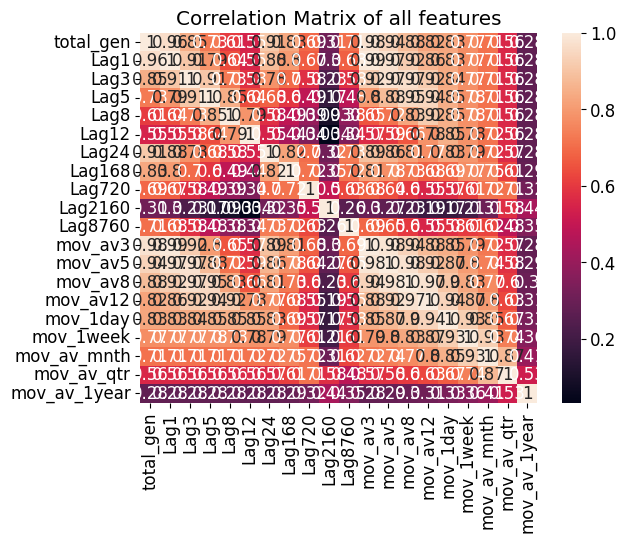

In [ ]:
corr_mat=data.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix of all features')

In [ ]:
corr_pairs=corr_mat.unstack()
print(corr_pairs)

total_gen     total_gen       1.000000
              Lag1            0.962951
              Lag3            0.848283
              Lag5            0.729956
              Lag8            0.607335
                                ...   
mov_av_1year  mov_1day        0.333209
              mov_1week       0.362028
              mov_av_mnth     0.405359
              mov_av_qtr      0.525811
              mov_av_1year    1.000000
Length: 400, dtype: float64


In [ ]:
sorted_pairs=corr_pairs.sort_values(kind='quicksort')
print(sorted_pairs)

Lag2160       Lag12           0.034016
Lag12         Lag2160         0.034016
Lag8          Lag2160         0.093145
Lag2160       Lag8            0.093145
Lag5          Lag2160         0.167251
                                ...   
mov_av12      mov_av12        1.000000
mov_1day      mov_1day        1.000000
mov_1week     mov_1week       1.000000
Lag2160       Lag2160         1.000000
mov_av_1year  mov_av_1year    1.000000
Length: 400, dtype: float64


In [ ]:
strong_pairs=sorted_pairs[abs(sorted_pairs)>.5]
print(strong_pairs)

Lag720        Lag2160         0.503980
Lag2160       Lag720          0.503980
mov_av_qtr    mov_av_1year    0.525811
mov_av_1year  mov_av_qtr      0.525811
Lag24         Lag12           0.547163
                                ...   
mov_av12      mov_av12        1.000000
mov_1day      mov_1day        1.000000
mov_1week     mov_1week       1.000000
Lag2160       Lag2160         1.000000
mov_av_1year  mov_av_1year    1.000000
Length: 314, dtype: float64


In [ ]:
columns=data.columns
columns

Index(['total_gen', 'date_time', 'Lag1', 'Lag3', 'Lag5', 'Lag8', 'Lag12',
       'Lag24', 'Lag168', 'Lag720', 'Lag2160', 'Lag8760', 'mov_av3', 'mov_av5',
       'mov_av8', 'mov_av12', 'mov_1day', 'mov_1week', 'mov_av_mnth',
       'mov_av_qtr', 'mov_av_1year'],
      dtype='object')

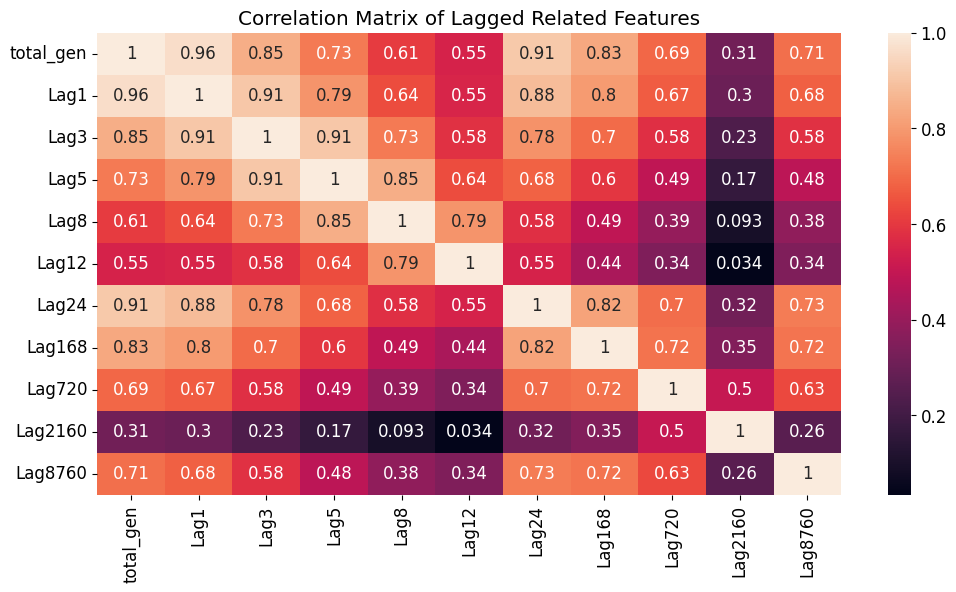

In [ ]:
data1=data[['total_gen','Lag1', 'Lag3', 'Lag5', 'Lag8', 'Lag12',
       'Lag24', 'Lag168', 'Lag720', 'Lag2160', 'Lag8760']]
plt.figure(figsize=(12,6))
corr_mat_1=data1.corr()
sns.heatmap(corr_mat_1,annot=True)
plt.title('Correlation Matrix of Lagged Related Features')
plt.show()

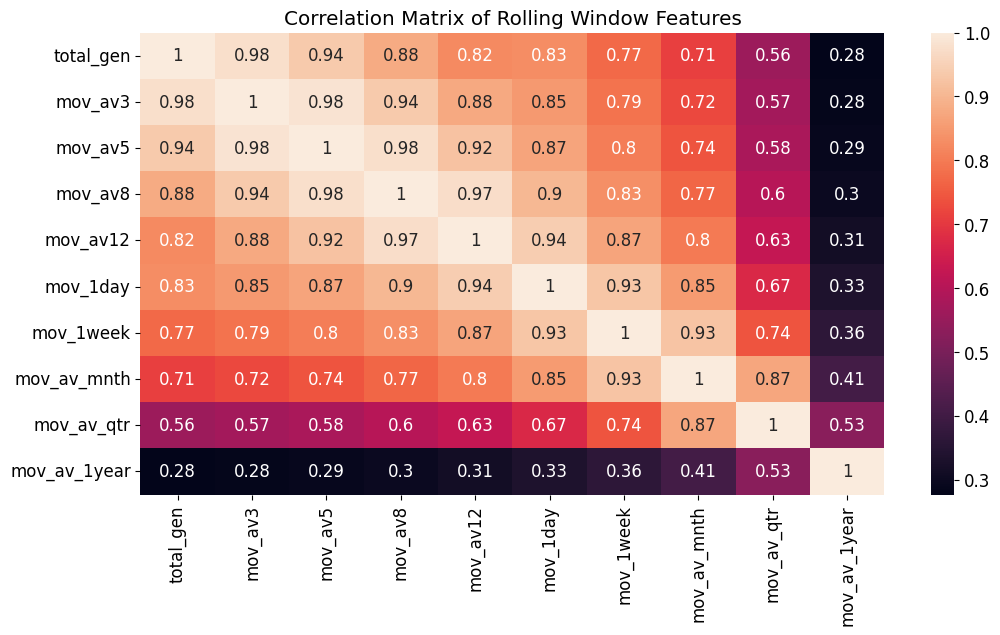

In [ ]:
data2=data[['total_gen','mov_av3', 'mov_av5', 'mov_av8', 'mov_av12', 'mov_1day', 'mov_1week', 'mov_av_mnth', 'mov_av_qtr', 'mov_av_1year']]
corr_mat_2=data2.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_mat_2,annot=True)
plt.title('Correlation Matrix of Rolling Window Features')
plt.show()

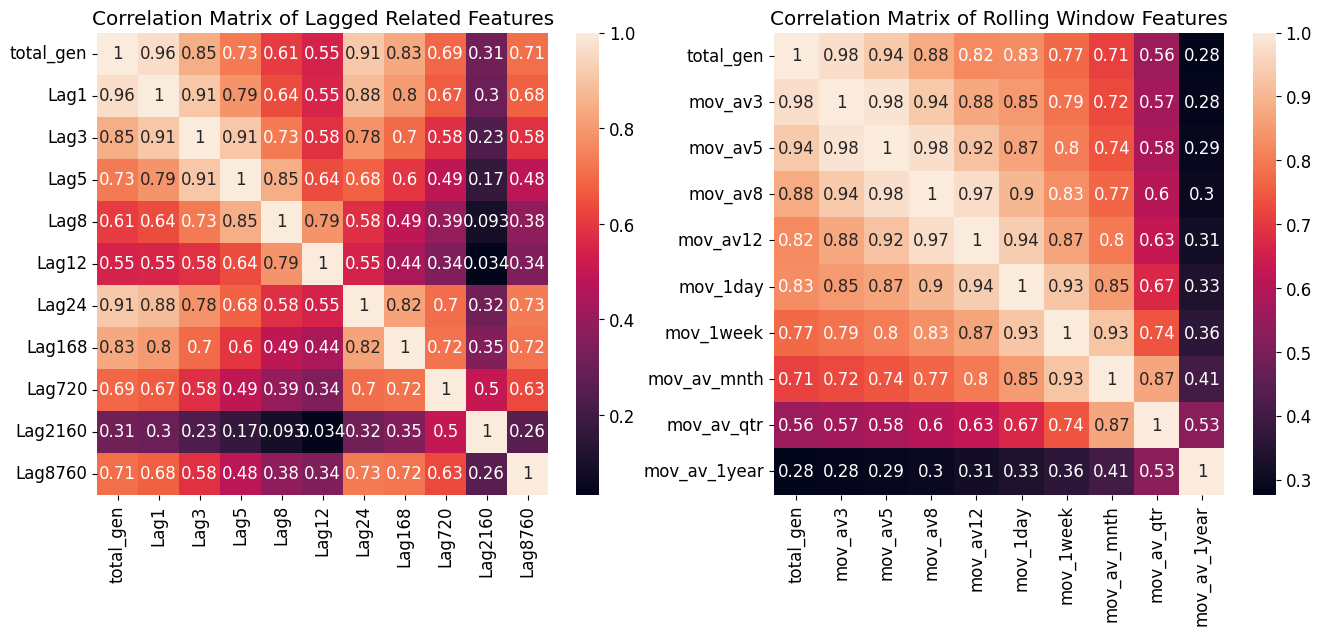

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,6))

sns.heatmap(corr_mat_1,ax=ax1,annot=True,cbar=True)
sns.heatmap(corr_mat_2,ax=ax2,annot=True,cbar=True)

# set title for each graph
ax1.set_title('Correlation Matrix of Lagged Related Features')
ax2.set_title('Correlation Matrix of Rolling Window Features')

# Add a common colorbar for both subplots
# cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7]) # [left, bottom, width, height]
# fig.colorbar(ax1.collections[0],cax=cbar_ax)

plt.show()

In [ ]:
data4=data.set_index('date_time')
data4.columns

Index(['total_gen', 'Lag1', 'Lag3', 'Lag5', 'Lag8', 'Lag12', 'Lag24', 'Lag168',
       'Lag720', 'Lag2160', 'Lag8760', 'mov_av3', 'mov_av5', 'mov_av8',
       'mov_av12', 'mov_1day', 'mov_1week', 'mov_av_mnth', 'mov_av_qtr',
       'mov_av_1year'],
      dtype='object')

In [ ]:
features= ['Lag1', 'Lag3', 'Lag5', 'Lag8', 'Lag12', 'Lag24', 'Lag168',
       'Lag720', 'Lag8760', 'mov_av3', 'mov_av5', 'mov_av8',
       'mov_av12', 'mov_1day', 'mov_1week', 'mov_av_mnth', 'mov_av_qtr']
target=['total_gen']

In [ ]:
feed=data4[features+target].dropna() #null value create problem during model training
feed.isnull().sum().sum()

0

In [ ]:
train=feed.loc['2017':'2020-06']
test=feed.loc['2020-07':'2021']

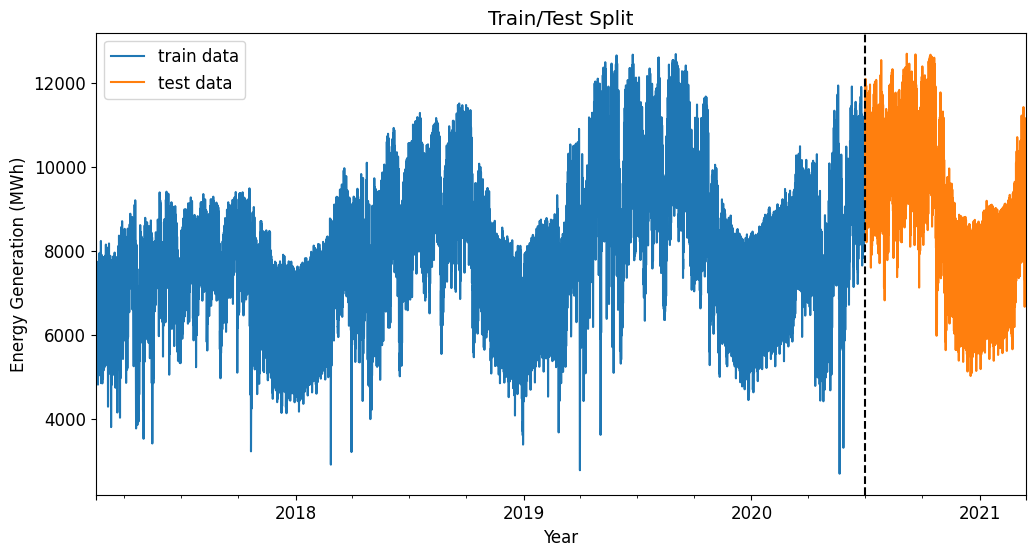

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
train['mov_av3'].plot(ax=ax,label="Training Set",title="Train/Test Split")
test['mov_av3'].plot(ax=ax,label="Testing Set")

ax.axvline('2020-07',color='black',ls='--')
plt.legend(['train data','test data'])
plt.ylabel('Energy Generation (MWh)')
plt.xlabel('Year')
plt.show()
plt.style.use('fivethirtyeight')

In [ ]:
X_train=train[features]
X_test=test[features]
y_train=train[target]
y_test=test[target]

In [ ]:
# test_data for 1 weekahead forecasting
test_1week=test['2020-07-01':'2020-07-06'][features]
actual_1week=test['2020-07-01':'2020-07-06'][target]

# test_data for 1 day ahead forecasting
test_1day=test['2020-07-01':'2020-07-02'][features]
actual_1day=test['2020-07-01':'2020-07-02'][target]

In [ ]:
test_1day.shape

(48, 17)

In [ ]:
test_1week.values

array([[11311.        , 11370.        , 11213.        , ...,
         9660.70833333,  9444.93194444,  8099.28472222],
       [11186.        , 11313.        , 11213.        , ...,
         9660.25595238,  9447.15694444,  8100.72546296],
       [11243.        , 11311.        , 11370.        , ...,
         9659.04166667,  9449.4625    ,  8102.11342593],
       ...,
       [11239.        ,  8427.        ,  9489.        , ...,
        10136.31547619,  9721.62638889,  8246.        ],
       [11471.        , 11239.        ,  8741.        , ...,
        10138.05952381,  9722.91944444,  8246.78333333],
       [11463.        , 11239.        ,  8427.        , ...,
        10139.85119048,  9724.05833333,  8247.80833333]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 12})

lr=LinearRegression()
model=lr.fit(X_train,y_train)
model.score(X_test,y_test)

0.9803944971225853

In [ ]:
test_1week_p=model.predict(test_1week)
model.score(test_1week,actual_1week)

0.902794126528733

In [ ]:
!pip install optuna

In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
xg_model=xgb.XGBRegressor(n_estimators=200)
xg_model.fit(X_train,y_train)
y_preds=xg_model.predict(X_test)
mean_absolute_error(y_test,y_preds)

129.79298550864522

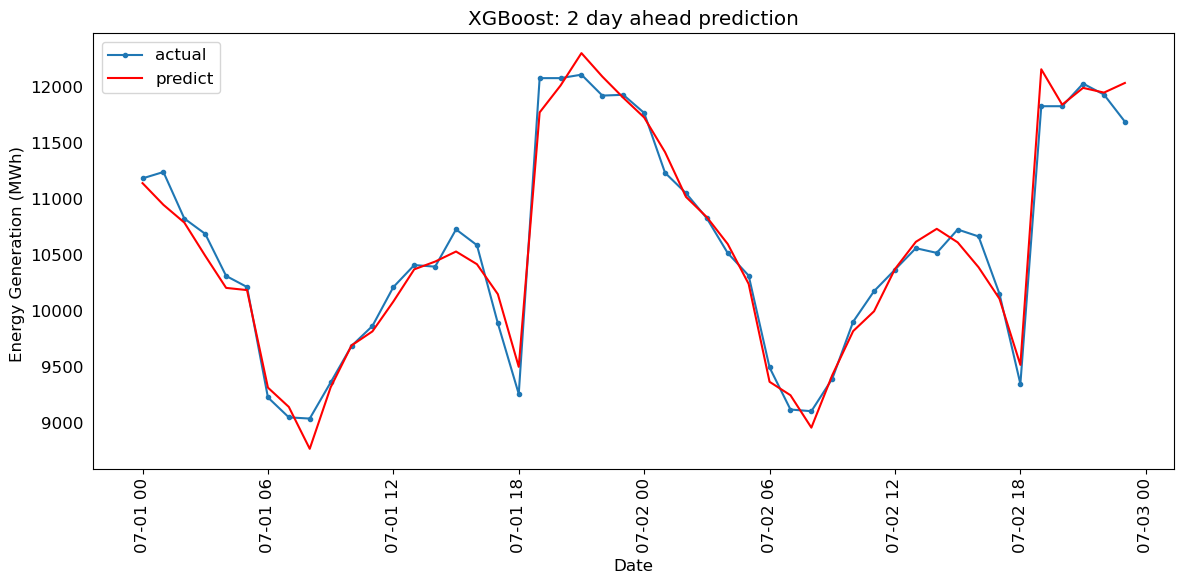

In [ ]:
# 1day ahead prediction
test_1day_p=xg_model.predict(test_1day)
plt.figure(figsize=(12,6))
plt.plot(actual_1day.index,actual_1day['total_gen'],marker='.',label='Actual')
plt.plot(actual_1day.index,test_1day_p,'r',label='Predict')
plt.tick_params(left=False,labelleft=True)
plt.title("XGBoost: 2 day ahead prediction")
plt.ylabel('Energy Generation (MWh) ')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(['actual','predict'])
plt.tight_layout()
plt.show()

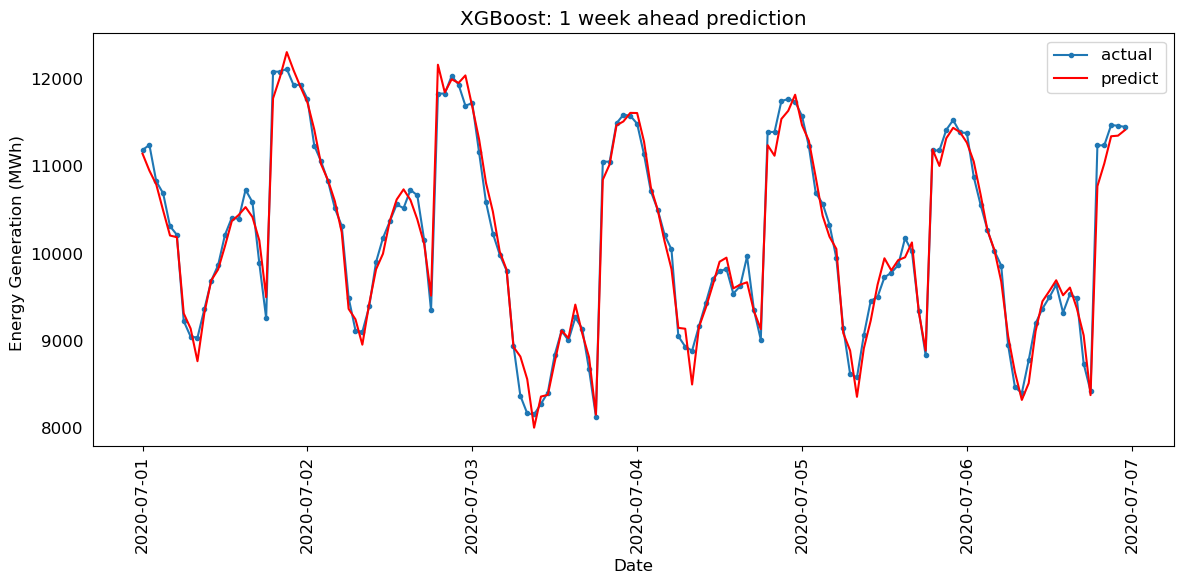

In [ ]:
# 1 week ahead load forecasting
test_1week_p=xg_model.predict(test_1week)
plt.figure(figsize=(12,6))
plt.plot(actual_1week.index,actual_1week['total_gen'],marker='.',label='Actual')
plt.plot(actual_1week.index,test_1week_p,'r',label='Predict')
plt.tick_params(left=False,labelleft=True)
plt.title("XGBoost: 1 week ahead prediction")
plt.ylabel('Energy Generation (MWh) ')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(['actual','predict'])
plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost Regressor model
model = xgb.XGBRegressor()

# Define the hyperparameter grid for the randomized search
param_grid = {
    'max_depth': [10,20,30,40],
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.05, 0.01, 0.15, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0, 0.5, 1]
}

# Define the randomized search cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=20, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the randomized search
best_params = random_search.best_params_

# Train the XGBoost Regressor with the best hyperparameters
xgb_model = xgb.XGBRegressor(max_depth=best_params['max_depth'],
                              n_estimators=best_params['n_estimators'],
                              learning_rate=best_params['learning_rate'],
                              reg_alpha=best_params['reg_alpha'],
                              reg_lambda=best_params['reg_lambda'])
xgb_model.fit(X_train, y_train)

# Use the best model to make predictions
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test,y_pred)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
import optuna
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data
# df = pd.read_csv('load_data.csv')

# Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('load', axis=1), df['load'], test_size=0.2, random_state=42)

def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20)
    }

    # Create XGBoost model with specified hyperparameters
    xgb_model = xgb.XGBRegressor(**params)

    # Train model on training set
    xgb_model.fit(X_train, y_train)

    # Predict on test set and calculate mean squared error
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Report mean squared error to Optuna
    return mse

# Set up Optuna study
study = optuna.create_study(direction='minimize')

# Optimize hyperparameters
study.optimize(objective, n_trials=100)

# Print results
print('Best hyperparameters: ', study.best_params)
print('Best mean squared error: ', study.best_value)

[I 2023-06-21 00:55:55,278] A new study created in memory with name: no-name-67960b04-9352-4ce5-b181-8fb61b36329a
[I 2023-06-21 00:56:03,358] Trial 0 finished with value: 17386746.39093455 and parameters: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.001519336995150957, 'subsample': 0.8611562347274354, 'colsample_bytree': 0.9932677210584476, 'gamma': 2.5067419790594517e-05, 'min_child_weight': 9}. Best is trial 0 with value: 17386746.39093455.
[I 2023-06-21 00:56:04,089] Trial 1 finished with value: 49282485.06194031 and parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.0011891638152405442, 'subsample': 0.7804160430107644, 'colsample_bytree': 0.19349905346318702, 'gamma': 0.0003019026890290792, 'min_child_weight': 16}. Best is trial 0 with value: 17386746.39093455.
[I 2023-06-21 00:56:12,030] Trial 2 finished with value: 3227089.671316414 and parameters: {'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.0023121824297061655, 'subsample': 0.4196682676

[I 2023-06-21 00:58:38,711] Trial 23 finished with value: 30705.568699760814 and parameters: {'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.01650808396617779, 'subsample': 0.3363426427639179, 'colsample_bytree': 0.536089414335067, 'gamma': 2.1149179085758825e-06, 'min_child_weight': 12}. Best is trial 17 with value: 25679.855644066425.
[I 2023-06-21 00:58:50,117] Trial 24 finished with value: 27682.97840189015 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.02292974170287055, 'subsample': 0.6173857657570571, 'colsample_bytree': 0.5856852262645711, 'gamma': 0.00011492160825599896, 'min_child_weight': 15}. Best is trial 17 with value: 25679.855644066425.
[I 2023-06-21 00:59:01,328] Trial 25 finished with value: 33287.321374237115 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.01321071313952669, 'subsample': 0.608038543751831, 'colsample_bytree': 0.44491430332319887, 'gamma': 0.00010318402375342253, 'min_child_weight': 14}. Best

[I 2023-06-21 01:02:17,812] Trial 46 finished with value: 25491.049133229135 and parameters: {'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.04248343269417939, 'subsample': 0.3021110472881249, 'colsample_bytree': 0.9137058803020388, 'gamma': 4.908795843555726e-06, 'min_child_weight': 8}. Best is trial 46 with value: 25491.049133229135.
[I 2023-06-21 01:02:22,464] Trial 47 finished with value: 26555.2696460405 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.05112029705108437, 'subsample': 0.303359433914105, 'colsample_bytree': 0.9203785842497826, 'gamma': 4.511712355111954e-06, 'min_child_weight': 8}. Best is trial 46 with value: 25491.049133229135.
[I 2023-06-21 01:02:26,114] Trial 48 finished with value: 28160.19175915833 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.04819037818743218, 'subsample': 0.2545774330228996, 'colsample_bytree': 0.9263191282064249, 'gamma': 7.117312644009573e-08, 'min_child_weight': 8}. Best is tri

[I 2023-06-21 01:04:07,200] Trial 69 finished with value: 28024.381481192064 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.045639901751117914, 'subsample': 0.641458872978315, 'colsample_bytree': 0.6201975716822826, 'gamma': 1.4117978961858472e-07, 'min_child_weight': 4}. Best is trial 64 with value: 25325.237672394847.
[I 2023-06-21 01:04:15,401] Trial 70 finished with value: 24533.028355350685 and parameters: {'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.055780329254983434, 'subsample': 0.669059957025103, 'colsample_bytree': 0.8260538105883929, 'gamma': 2.885894909722453e-07, 'min_child_weight': 9}. Best is trial 70 with value: 24533.028355350685.
[I 2023-06-21 01:04:22,903] Trial 71 finished with value: 25751.757267512916 and parameters: {'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.0555096511724014, 'subsample': 0.6897752457775264, 'colsample_bytree': 0.8218720877635286, 'gamma': 4.066566113479849e-07, 'min_child_weight': 9}. Best is 

[I 2023-06-21 01:07:45,232] Trial 92 finished with value: 25478.202099417533 and parameters: {'n_estimators': 900, 'max_depth': 6, 'learning_rate': 0.07069648921356876, 'subsample': 0.8048921243303895, 'colsample_bytree': 0.7247559535058262, 'gamma': 1.0460187083537176e-08, 'min_child_weight': 11}. Best is trial 72 with value: 24523.521632292403.
[I 2023-06-21 01:07:54,584] Trial 93 finished with value: 26194.617884697425 and parameters: {'n_estimators': 900, 'max_depth': 6, 'learning_rate': 0.0711313397155755, 'subsample': 0.8162615491936398, 'colsample_bytree': 0.6687060712525378, 'gamma': 1.0115676044769257e-08, 'min_child_weight': 11}. Best is trial 72 with value: 24523.521632292403.
[I 2023-06-21 01:08:04,852] Trial 94 finished with value: 26038.503356394303 and parameters: {'n_estimators': 900, 'max_depth': 6, 'learning_rate': 0.09932424580937409, 'subsample': 0.8542984113069152, 'colsample_bytree': 0.7235763632166798, 'gamma': 4.244468764406509e-08, 'min_child_weight': 12}. Best

Best hyperparameters:  {'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.0585786065957052, 'subsample': 0.7596539186425175, 'colsample_bytree': 0.8301131598711157, 'gamma': 3.233507453516893e-07, 'min_child_weight': 9}
Best mean squared error:  24523.521632292403


In [ ]:
study.best_params

{'n_estimators': 400,
 'max_depth': 9,
 'learning_rate': 0.0585786065957052,
 'subsample': 0.7596539186425175,
 'colsample_bytree': 0.8301131598711157,
 'gamma': 3.233507453516893e-07,
 'min_child_weight': 9}

In [ ]:
params=study.best_params
params['n_estimators']

400

In [ ]:
import xgboost as xgb
xg_model=xgb.XGBRegressor(n_estimators=params['n_estimators'],
                          max_depth=params['max_depth'],
                          learning_rate=params['learning_rate'],
                          subsample=params['subsample'],
                          colsample_bytree=params['colsample_bytree'],
                          gamma=params['gamma'],
                          min_child_weight=params['min_child_weight']
                          )
xg_model.fit(X_train,y_train)
y_preds=xg_model.predict(X_test)
mean_absolute_error(y_test,y_preds),

(110.80749456518997,)

In [ ]:
y_preds=xg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_preds))

156.59987749769283

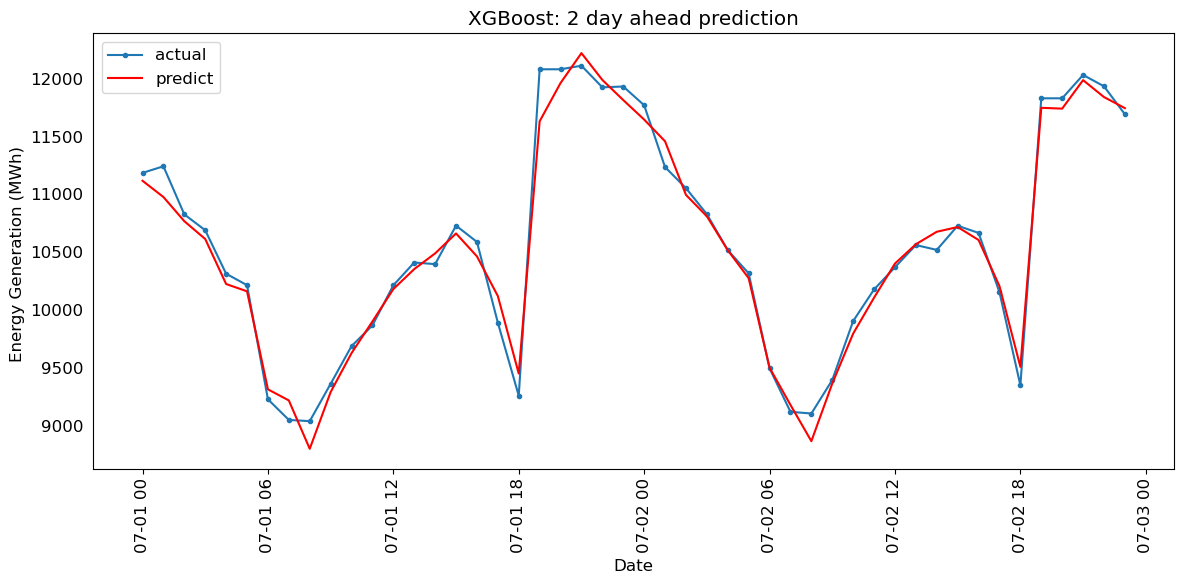

In [ ]:
# 1day ahead prediction
test_1day_p=xg_model.predict(test_1day)
plt.figure(figsize=(12,6))
plt.plot(actual_1day.index,actual_1day['total_gen'],marker='.',label='Actual')
plt.plot(actual_1day.index,test_1day_p,'r',label='Predict')
plt.tick_params(left=False,labelleft=True)
plt.title("XGBoost: 2 day ahead prediction")
plt.ylabel('Energy Generation (MWh) ')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(['actual','predict'])
plt.tight_layout()
plt.show()

In [ ]:
#Create ANN
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
from keras.layers import LeakyReLU,PReLU,ELU,ReLU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

#ANN

ann = Sequential()
ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# ann.add(Dropout(0.3))
ann.add(Dense(80, kernel_initializer='normal', activation='relu'))
# ann.add(Dropout(.3))
ann.add(Dense(40,activation='relu'))
ann.add(Dense(20,activation='relu'))

ann.add(Dense(1, kernel_initializer='normal', activation='linear'))
ann.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_error'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
ann.fit(X_train,y_train, epochs=200, batch_size=32,verbose=2 ,validation_data=(X_test,y_test),callbacks=[early_stopping])

pred=ann.predict(X_test)
print(mean_absolute_error(y_test,pred))

ModuleNotFoundError: ignored

In [ ]:
mean_squared_error(y_test,pred)

30676.212089340093

2/2 [==============================] - 0s 2ms/step


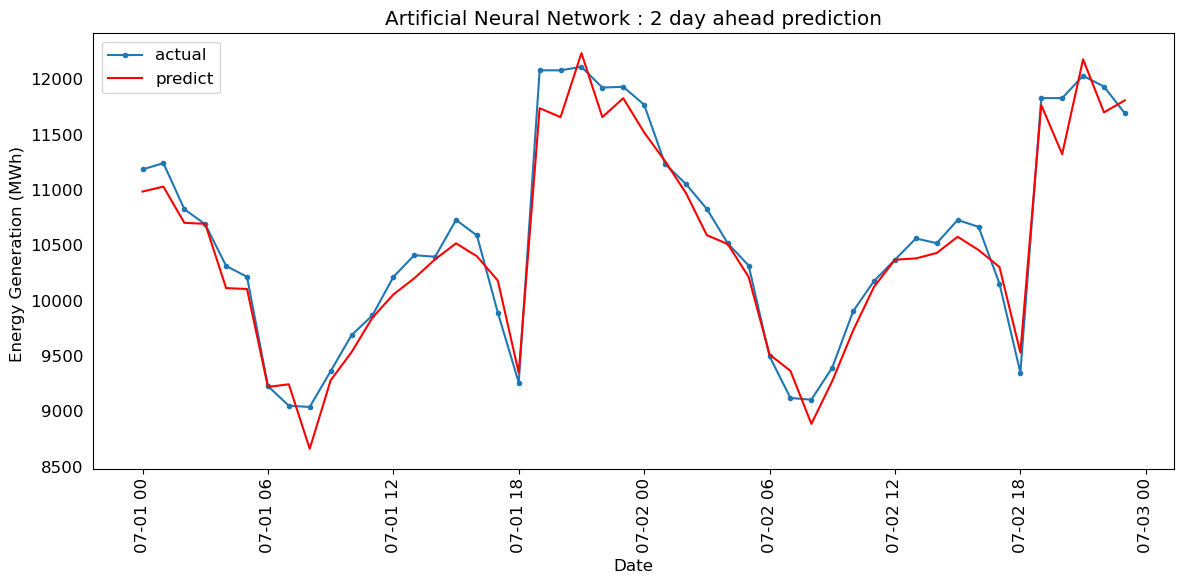

In [ ]:
# 1day ahead prediction
test_1day_p=ann.predict(test_1day)
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 12})
plt.plot(actual_1day.index,actual_1day['total_gen'],marker='.',label='Actual')
plt.plot(actual_1day.index,test_1day_p,'r',label='Predict')
plt.tick_params(left=False,labelleft=True)
plt.title("Artificial Neural Network : 2 day ahead prediction")
plt.ylabel('Energy Generation (MWh) ')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(['actual','predict'])
plt.tight_layout()
plt.show()


5/5 [==============================] - 0s 0s/step


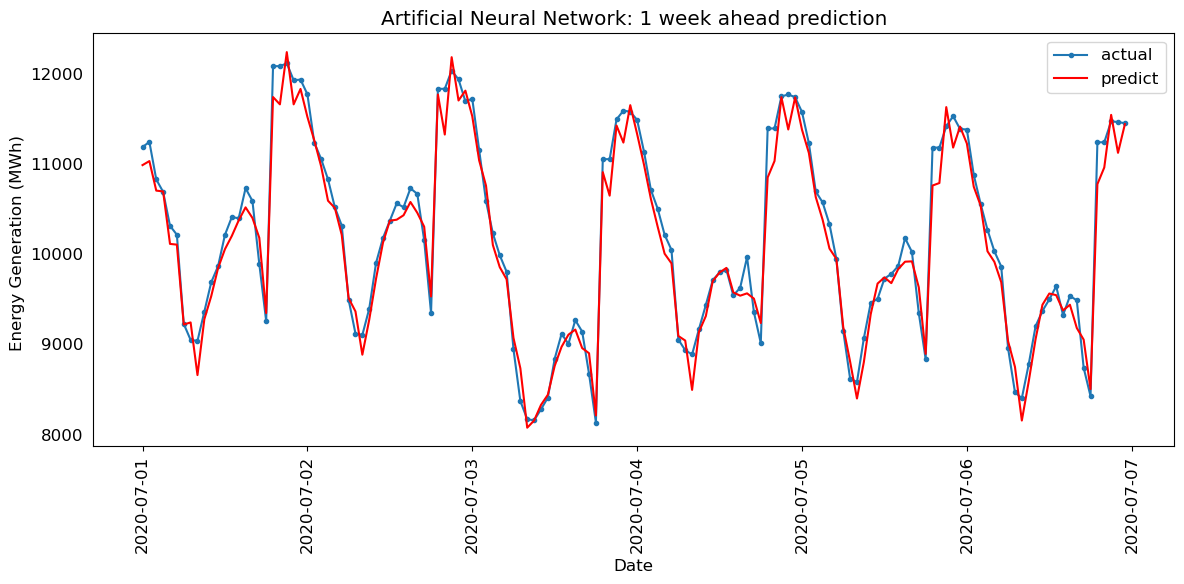

In [ ]:
test_1week_p=ann.predict(test_1week)
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 12})
plt.plot(actual_1week.index,actual_1week['total_gen'],marker='.',label='Actual')
plt.plot(actual_1week.index,test_1week_p,'r',label='Predict')
plt.tick_params(left=False,labelleft=True)
plt.title("Artificial Neural Network: 1 week ahead prediction")
plt.ylabel('Energy Generation (MWh) ')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend(['actual','predict'])
plt.tight_layout()
plt.show()